# ------------ P O R T F O L I O  1 ------------ 

In [90]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import timedelta
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline

# Analysis of Cycling Data

## Loading Data

The first dataset is an export of my ride data from [Strava](https://strava.com/), an online social 
network site for cycling and other sports.  This data is a log of every ride since the start of 2018
and contains summary data like the distance and average speed.  It was exported using 
the script `stravaget.py` which uses the stravalib module to read data. Some details of
the fields exported by that script can be seen in [the documentation for stravalib](https://pythonhosted.org/stravalib/api.html#stravalib.model.Activity). 

The exported data is a CSV file so that's easy to read, however the date information in the file is 
recorded in a different timezone (UTC) so we need to do a bit of conversion.  In reading the data I'm
setting the index of the data frame to be the datetime of the ride. 

In [91]:
strava = pd.read_csv('data/strava_export.csv', index_col='date', parse_dates=True)
strava.index = strava.index.tz_localize('UTC')
strava.head()

average_heartrate  average_temp  average_watts  \
date                                                                        
2018-01-02 20:47:51+00:00              100.6          21.0           73.8   
2018-01-04 01:36:53+00:00                NaN          24.0          131.7   
2018-01-04 02:56:00+00:00               83.1          25.0           13.8   
2018-01-04 05:37:04+00:00              110.1          24.0          113.6   
2018-01-05 19:22:46+00:00              110.9          20.0          147.7   

                          device_watts  distance  elapsed_time elevation_gain  \
date                                                                            
2018-01-02 20:47:51+00:00        False      15.2            94       316.00 m   
2018-01-04 01:36:53+00:00        False      18.0            52       236.00 m   
2018-01-04 02:56:00+00:00        False       0.0             3         0.00 m   
2018-01-04 05:37:04+00:00        False      22.9            77       246.00 m   
2018-01-05 19:22:46+00:00         True      58.4           189       676.00 m   

                           kudos  moving_time workout_type  
date                                                        
2018-01-02 20:47:51+00:00     10           73         Ride  
2018-01-04 01:36:53+00:00      5           46         Ride  
2018-01-04 02:56:00+00:00      2            2         Ride  
2018-01-04 05:37:04+00:00      8           64         Ride  
2018-01-05 19:22:46+00:00     12          144         Ride

The second dataset comes from an application called [GoldenCheetah](https://www.goldencheetah.org/) which provides
some analytics services over ride data.  This has some of the same fields but adds a lot of analysis of the 
power, speed and heart rate data in each ride.  This data overlaps with the Strava data but doesn't include all 
of the same rides. 

Again we create an index using the datetime for each ride, this time combining two columns in the data (date and time) 
and localising to Sydney so that the times match those for the Strava data. 

In [92]:
cheetah = pd.read_csv('data/cheetah.csv', skipinitialspace=True)
cheetah.index = pd.to_datetime(cheetah['date'] + ' ' + cheetah['time'])
cheetah.index = cheetah.index.tz_localize('Australia/Sydney')
cheetah.head()

date      time                  filename  \
2018-01-28 06:39:49+11:00  01/28/18  06:39:49  2018_01_28_06_39_49.json   
2018-01-28 07:01:32+11:00  01/28/18  07:01:32  2018_01_28_07_01_32.json   
2018-02-01 08:13:34+11:00  02/01/18  08:13:34  2018_02_01_08_13_34.json   
2018-02-06 08:06:42+11:00  02/06/18  08:06:42  2018_02_06_08_06_42.json   
2018-02-07 17:59:05+11:00  02/07/18  17:59:05  2018_02_07_17_59_05.json   

                           axPower  aPower Relative Intensity  aBikeScore  \
2018-01-28 06:39:49+11:00  202.211                    0.75452     16.6520   
2018-01-28 07:01:32+11:00  226.039                    0.84343     80.2669   
2018-02-01 08:13:34+11:00    0.000                    0.00000      0.0000   
2018-02-06 08:06:42+11:00  221.672                    0.82714     78.8866   
2018-02-07 17:59:05+11:00  218.211                    0.81422    159.4590   

                           Skiba aVI  aPower Response Index  aIsoPower  \
2018-01-28 06:39:49+11:00    1.31920                1.67755    223.621   
2018-01-28 07:01:32+11:00    1.21137                1.54250    246.185   
2018-02-01 08:13:34+11:00    0.00000                0.00000      0.000   
2018-02-06 08:06:42+11:00    1.35775                1.86002    254.409   
2018-02-07 17:59:05+11:00    1.47188                1.74658    233.780   

                               aIF    ...     Rest AVNN  Rest SDNN  \
2018-01-28 06:39:49+11:00  0.83441    ...             0          0   
2018-01-28 07:01:32+11:00  0.91860    ...             0          0   
2018-02-01 08:13:34+11:00  0.00000    ...             0          0   
2018-02-06 08:06:42+11:00  0.94929    ...             0          0   
2018-02-07 17:59:05+11:00  0.87231    ...             0          0   

                           Rest rMSSD  Rest PNN50  Rest LF  Rest HF  \
2018-01-28 06:39:49+11:00           0           0        0        0   
2018-01-28 07:01:32+11:00           0           0        0        0   
2018-02-01 08:13:34+11:00           0           0        0        0   
2018-02-06 08:06:42+11:00           0           0        0        0   
2018-02-07 17:59:05+11:00           0           0        0        0   

                           HRV Recovery Points       NP       IF       TSS  
2018-01-28 06:39:49+11:00                    0  222.856  0.83155   20.2257  
2018-01-28 07:01:32+11:00                    0  245.365  0.91554   94.5787  
2018-02-01 08:13:34+11:00                    0    0.000  0.00000    0.0000  
2018-02-06 08:06:42+11:00                    0  253.702  0.94665   98.3269  
2018-02-07 17:59:05+11:00                    0  232.644  0.86808  171.0780  

[5 rows x 362 columns]

The GoldenCheetah data contains many many variables (columns) and I won't go into all of them here. Some
that are of particular interest for the analysis below are:

Here are definitions of some of the more important fields in the data. Capitalised fields come from the GoldenCheetah data
while lowercase_fields come from Strava. There are many cases where fields are duplicated and in this case the values
should be the same, although there is room for variation as the algorithm used to calculate them could be different
in each case. 

  * Duration - overall duration of the ride, should be same as elapsed_time
  * Time Moving - time spent moving (not resting or waiting at lights), should be the same as moving_time
  * Elevation Gain - metres climbed over the ride
  * Average Speed - over the ride
  * Average Power - average power in watts as measured by a power meter, relates to how much effort is being put in to the ride, should be the same as  * average_watts' from Strava
  * Nonzero Average Power - same as Average Power but excludes times when power is zero from the average
  * Average Heart Rate - should be the same as average_heartrate
  * Average Cadence - cadence is the rotations per minute of the pedals
  * Average Temp - temperature in the environment as measured by the bike computer (should be same as average_temp)
  * VAM - average ascent speed - speed up hills
  * Calories (HR) - Calorie expendature as estimated from heart rate data
  * 1 sec Peak Power - this and other  'Peak Power' measures give the maximum power output in the ride over this time period.  Will be higher for shorter periods. High values in short periods would come from a very 'punchy' ride with sprints for example.
  * 1 min Peak Hr - a similar measure relating to Heart Rate
  * NP - Normalised Power, a smoothed average power measurement, generally higher than Average Power 
  * TSS - Training Stress Score, a measure of how hard a ride this was
  * device_watts - True if the power (watts) measures were from a power meter, False if they were estimated
  * distance - distance travelled in Km
  * kudos - likes from other Strava users (social network)
  * workout_type - one of  'Race',  'Workout' or  'Ride'
  
  
Some of the GoldenCheetah parameters are defined [in thier documentation](https://github.com/GoldenCheetah/GoldenCheetah/wiki/UG_Glossary).  

## Your Tasks

Your first task is to combine these two data frames using the [`join` method of Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#joining-on-index).   The goal is to keep only those rows of data 
that appear in __both__ data frames so that we have complete data for every row.  

### Combined Data
The goal is to keep only those rows of data that appear in both data frames so that we have complete data for every row.

In [93]:
# Combined data that appear in both data
result = pd.concat([strava, cheetah], axis=1, join='inner')
result.head()

average_heartrate  average_temp  average_watts  \
2018-01-28 06:39:49+11:00              120.6          21.0          153.4   
2018-01-28 07:01:32+11:00              146.9          22.0          187.7   
2018-02-01 08:13:34+11:00              109.8          19.0          143.0   
2018-02-06 08:06:42+11:00              119.3          19.0          165.9   
2018-02-07 17:59:05+11:00              124.8          20.0          151.0   

                          device_watts  distance  elapsed_time elevation_gain  \
2018-01-28 06:39:49+11:00         True       7.6            17        95.00 m   
2018-01-28 07:01:32+11:00         True      38.6            67       449.00 m   
2018-02-01 08:13:34+11:00        False      26.3           649       612.00 m   
2018-02-06 08:06:42+11:00         True      24.3            69       439.00 m   
2018-02-07 17:59:05+11:00         True      47.1           144       890.00 m   

                           kudos  moving_time workout_type    ...     \
2018-01-28 06:39:49+11:00      4           17         Ride    ...      
2018-01-28 07:01:32+11:00     19           67         Race    ...      
2018-02-01 08:13:34+11:00      6          113         Ride    ...      
2018-02-06 08:06:42+11:00      6           65         Ride    ...      
2018-02-07 17:59:05+11:00     10          134         Ride    ...      

                          Rest AVNN Rest SDNN Rest rMSSD  Rest PNN50  Rest LF  \
2018-01-28 06:39:49+11:00         0         0          0           0        0   
2018-01-28 07:01:32+11:00         0         0          0           0        0   
2018-02-01 08:13:34+11:00         0         0          0           0        0   
2018-02-06 08:06:42+11:00         0         0          0           0        0   
2018-02-07 17:59:05+11:00         0         0          0           0        0   

                           Rest HF  HRV Recovery Points       NP       IF  \
2018-01-28 06:39:49+11:00        0                    0  222.856  0.83155   
2018-01-28 07:01:32+11:00        0                    0  245.365  0.91554   
2018-02-01 08:13:34+11:00        0                    0    0.000  0.00000   
2018-02-06 08:06:42+11:00        0                    0  253.702  0.94665   
2018-02-07 17:59:05+11:00        0                    0  232.644  0.86808   

                                TSS  
2018-01-28 06:39:49+11:00   20.2257  
2018-01-28 07:01:32+11:00   94.5787  
2018-02-01 08:13:34+11:00    0.0000  
2018-02-06 08:06:42+11:00   98.3269  
2018-02-07 17:59:05+11:00  171.0780  

[5 rows x 372 columns]

In [94]:
# Showing the dimensional of the new combined data
result.shape

(243, 372)

## Required Analysis

1. Remove rides with no measured power (where device_watts is False) - these are commutes or MTB rides
* Look at the distributions of some key variables: time, distance, average speed, average power, TSS. Are they normally distributed? Skewed? 
* Explore the relationships between the following variables. Are any of them corrolated with each other (do they vary together in a predictable way)? Can you explain any relationships you observe?  
    * Distance
    * Moving Time
    * Average Speed
    * Heart Rate
    * Power (watts)
    * Normalised power (NP)
    * Training Stress Score
    * Elevation Gain
* We want to explore the differences between the three categories: `Race`, `Workout` and `Ride`.
    * Use scatter plots with different colours for each category to explore how these categories differ.  
    * Use histograms or box plots to visualise the different distributions of a variable for the three categories.
    * In both cases, experiment with different variables but only include those that are interesting in your final notebook (if none are interesting, show us a representative example).


## Challenge

* What leads to more `kudos`? Is there anything to indicate which rides are more popular? Explore the relationship between the main variables and kudos. Show a plot and comment on any relationship you observe. 

* Generate a plot that summarises the number of km ridden each month over the period of the data. Overlay this with the _sum_ of the Training Stress Score and the _average_ of the Average Speed to generate an overall summary of activity.

* Generate a similar graph but one that shows the activity over a given month, with the sum of the values for each day of the month shown.  So, if there are two rides on a given day, the graph should show the sum of the distances etc for these rides.

Hint: to generate these summary plots you need to use the [timeseries/date functionality](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html) in Pandas to generate a new data frame containing the required data.  

__Note:__ once you have completed these steps you can remove this cell.  Use the text as a starting point for the documentation of your workflow and discussion of results.


### #1 Analysis - Device Watts Filtered
Remove rides with no measured power (where device_watts is False) - these are commutes or MTB rides.

Also removing rows that has missing data (NaN data)

In [95]:
# Remove rides with no measured power (where device_watts is False)
result_true = result[result['device_watts']==True]
# Remove rides with missing data
result_true = result_true.dropna()

### #2 Analysis - Distribution 
Look at the distributions of some key variables: time, distance, average speed, average power, TSS. Are they normally distributed? Skewed?

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


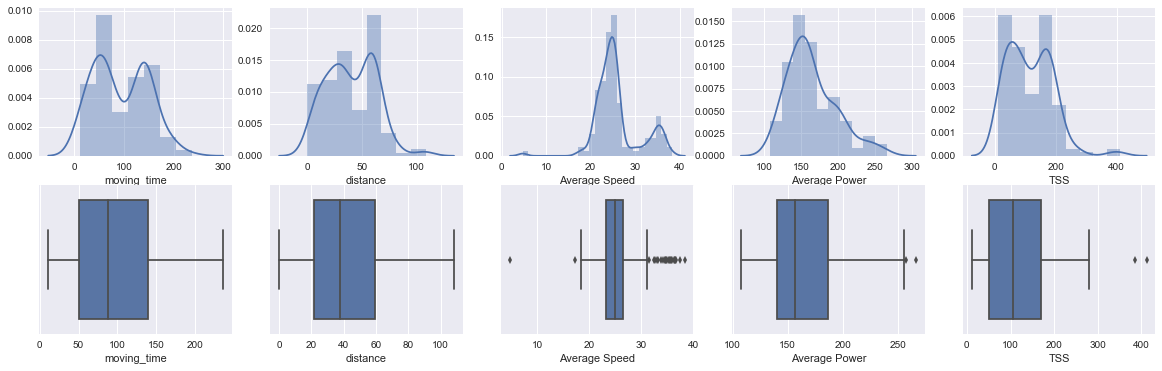

In [96]:
# Plotting the histogram and boxplo for time, distance, average speed, average power, TSS
f, axes = plt.subplots(2, 5,figsize=(20, 6))
sns.distplot(result_true['moving_time'], ax=axes[0,0])
sns.distplot(result_true['distance'], ax=axes[0,1])
sns.distplot(result_true['Average Speed'], ax=axes[0,2])
sns.distplot(result_true['Average Power'], ax=axes[0,3])
sns.distplot(result_true['TSS'], ax=axes[0,4])
sns.boxplot(result_true['moving_time'], ax=axes[1,0])
sns.boxplot(result_true['distance'], ax=axes[1,1])
sns.boxplot(result_true['Average Speed'], ax=axes[1,2])
sns.boxplot(result_true['Average Power'], ax=axes[1,3])
sns.boxplot(result_true['TSS'], ax=axes[1,4])

From the histogram and boxplot diagrams above, it can be seen that __moving_time__, __Distance__, __Average Power__, and __TSS__  variables are not normally distributed, instead they are skewed to the right since the box in the boxplot diagrams are not located on the middle but slightly to the left. While the __Average Speed__ data tends to be normally distributed.

### #3 Relationship between Variables
Explore the relationships between the following variables. Are any of them corrolated with each other (do they vary together in a predictable way)? Can you explain any relationships you observe?
- Distance
- Moving Time
- Average Speed
- Heart Rate
- Power (watts)
- Normalised power (NP)
- Training Stress Score
- Elevation Gain

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  app.launch_new_instance()


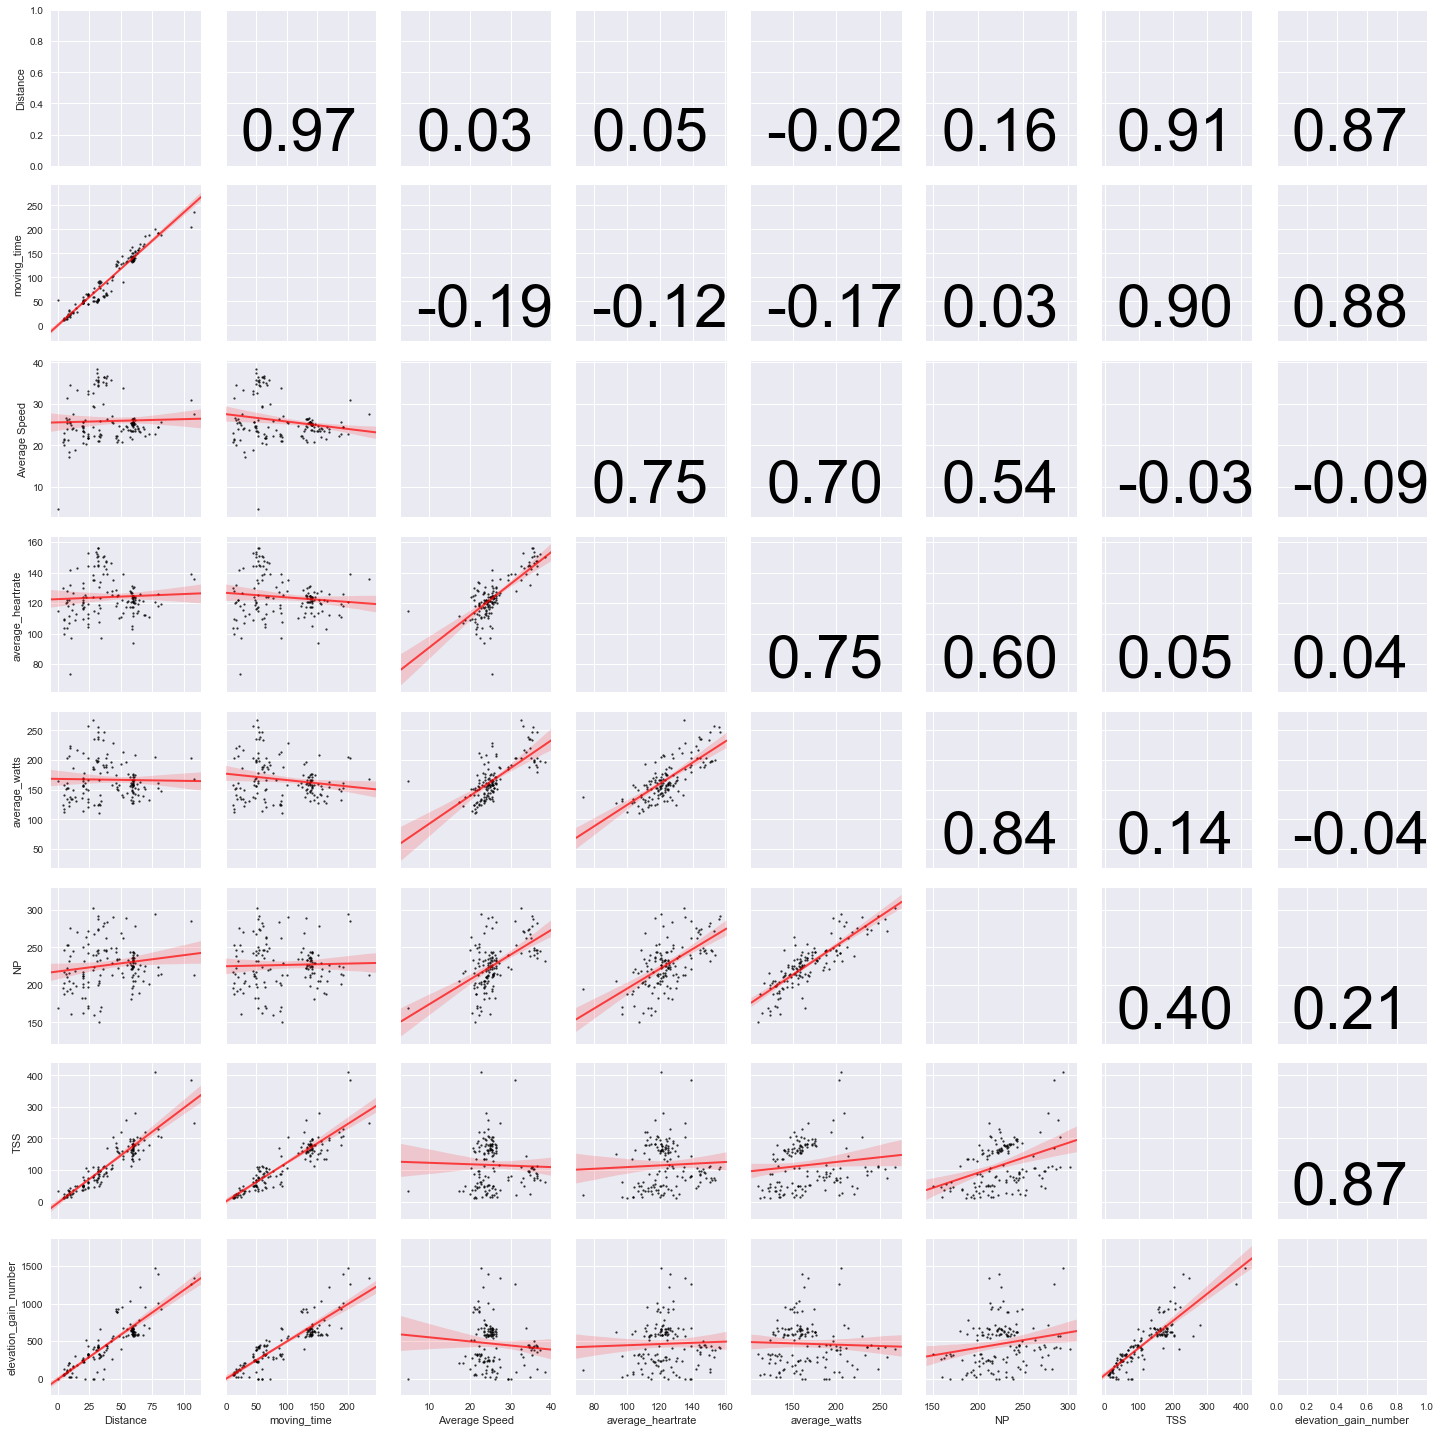

In [9]:
# Extracting the columns that are going to be analysed

result_true['elevation_gain_number'] = result_true['elevation_gain'].str.extract('(\\d+)').astype(int)
analyze = result_true[['Distance', 'moving_time', 'Average Speed', 'average_heartrate', 'average_watts', 'NP', 'TSS', 'elevation_gain_number']]

# Define the correlation coefficient function
from scipy.stats import pearsonr
def corrfunc(x, y, **kws):
    (r, p) = pearsonr(x, y)
    ax = plt.gca()
    ax.text(0.1, 0.1, "{0:.2f}".format(r),
        transform=ax.transAxes,
        color='black', fontsize=60)

# Plotting the scatter plot and the correlation coefficient
g = sns.PairGrid(analyze)
g.map_lower(sns.regplot, color="0",line_kws={"color":"r","alpha":0.7,"lw":2}, scatter_kws={'s':5})
g.map_upper(corrfunc)

The scatter plot pictures how each variables interact. For example in the first scatter plot which is between the __moving_time__ and __Distance__, we can see as the __Distance__ increasing the __moving_time__ is also increasing, therefore they have a positive correlation as they move the same.

In the diagrams above, the correlation coefficients are also shown, we can easily analyse the realationship between the variables based on the number. A correlation coefficient of 1 is total high positive correlation, -1 is total negative correlation, and 0 represents no correlation.
- Positive coefficient meaning that the variables is increasing or decreasing as the other variable is.
- Negative coefficient meaning that the variable react oppositely from the other variable (If the first variable is increasing, then the second variable is decreasing, vice versa).
- The bigger the positive number (max 1) or the smaller the negative number (max -1), the more correlated the variables are.

From the information and diagram above, it can be concluded that these are __the variables with high correlation__ (correlation above 0.50 or below -0.50):
- Distance and Moving time (coef = 0.97)
- Distance and TSS (coef = 0.91)
- Distance and Elevation Gain (coef = 0.87)
- Moving Time and TSS (coef = 0.90)
- Moving Time and Elevation Gain (coef = 0.88)
- Average Speed and Average Heart Rate (coef = 0.75)
- Average Speed and Average Power (coef = 0.70)
- Average Speed and NP (coef = 0.54)
- Average Heart Rate and Average Power (coef = 0.75)
- Average Heart Rate and NP (coef = 0.60)
- Average Power and NP (coef = 0.84)
- TSS and Elevation Gain (coef = 0.87)

### #4 Analyse Differences Between These Categories: Ride, Workout, and Ride
We want to explore the differences between the three categories: Race, Workout and Ride.
- Use scatter plots with different colours for each category to explore how these categories differ.
- Use histograms or box plots to visualise the different distributions of a variable for the three categories.
- In both cases, experiment with different variables but only include those that are interesting in your final notebook (if none are interesting, show us a representative example).

In [10]:
# Make a new dataset for the key variables to be observed later
differences = result_true[['workout_type', 'elapsed_time',  'Distance', 'average_temp', 'moving_time', 'Average Speed', 'average_heartrate', 'average_watts', 'NP', 'TSS', 'elevation_gain_number', 'Calories (HR)']]

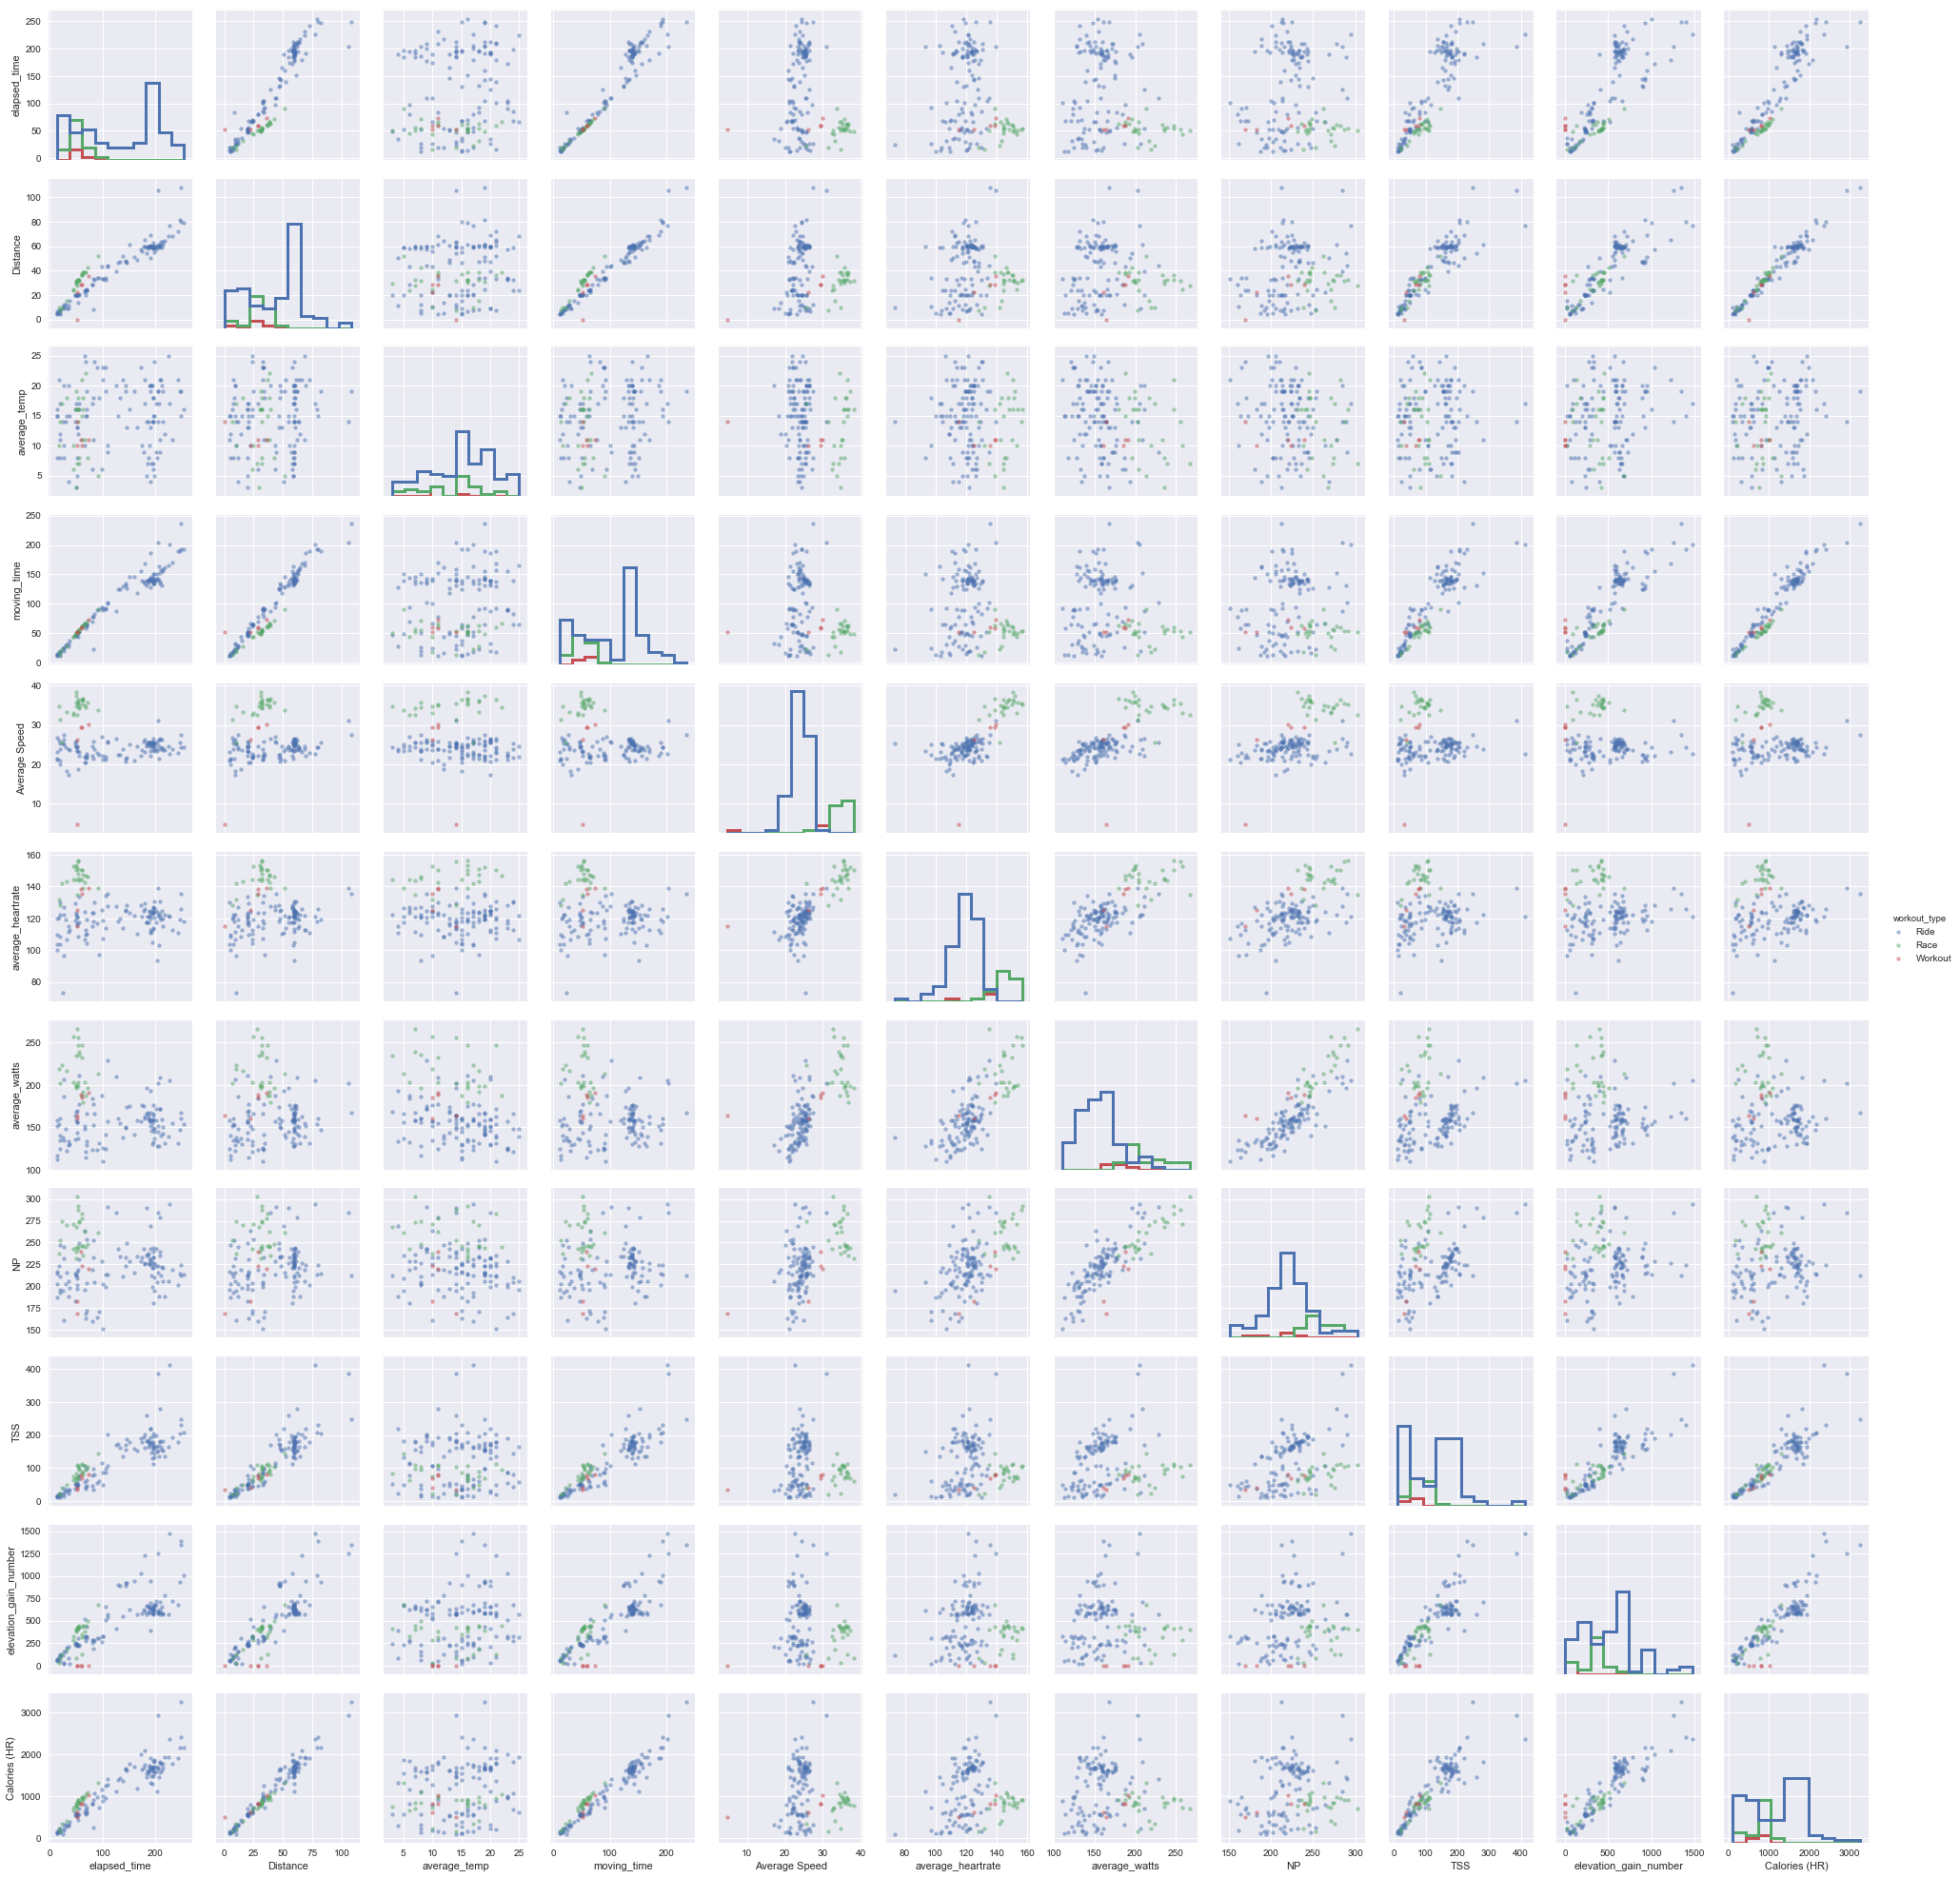

In [20]:
# To have a quick analysis using a PairGrid for the key variables
g = sns.PairGrid(differences, hue="workout_type")
g = g.map_diag(plt.hist, histtype='step', lw=3)
g = g.map_offdiag(plt.scatter, s=15, alpha=0.5)
g = g.add_legend()

#Saving figure to a file so it can be clearly seen in the pdf file
g.savefig('plot/Portofolio 1 plot.pdf')

We don't have the same amount of data for each category therefore there might be a bias in the analysis, in fact there is only 5 data for the workout category.
But here is the analysis from the histogram and scatter plot above:
- Distribution analysis:
	* The workout and race has a fewer __elapsed time__, closer __distance__, fewer __moving time__, less __TSS__, less __elevation gain__, and fewer __calories__, while the Ride category tends to have a wider range in those features.
	* The race category tends to have a faster __Average Speed__, __Average Heart Rate__, __Average Power (average_watts)__, and __Normalised Power(NP)__ than the other category. 
    * The workout category has a low __elevation number__ if compared to other category


- Correlation analysis:
    * There is not much different among the categories, most of the correlations are the pretty much the same, but there might be a slight differences in some variables below:
        - Between __NP__ and __TSS__ :Work category has a really high correlation, then followed bu the Ride category, while the Race category has the lowest correlation
        - Between __average_heartrate__ and __average_watts__= There is somewhat a strong relationship on the Ride category, but low correlation in the Race category, and a really high correlation in the workout category.
        - Between __Calories__ and __average_watts__: It can be seen that the Race category has a negative correlation while the Ride has a positive correlation, and the workout has a higher positive correlation 

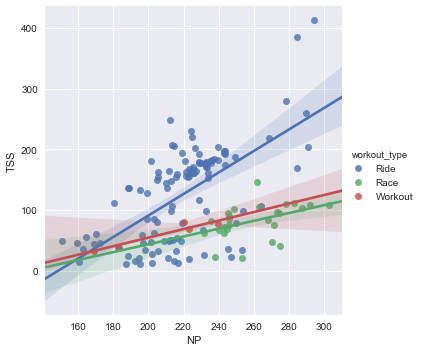

In [49]:
# Correlation between NP and TSS
gr = sns.lmplot(x="NP", y="TSS", hue="workout_type", data=result_true)

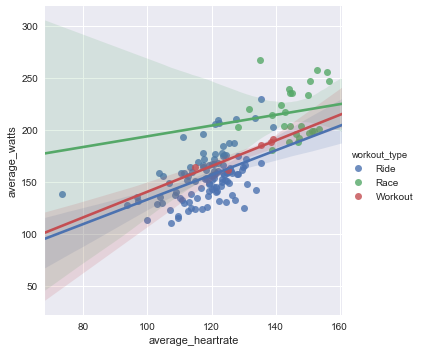

In [50]:
# Correlation between average_heartrate and average_watts
gr = sns.lmplot(x="average_heartrate", y="average_watts", hue="workout_type", data=result_true)

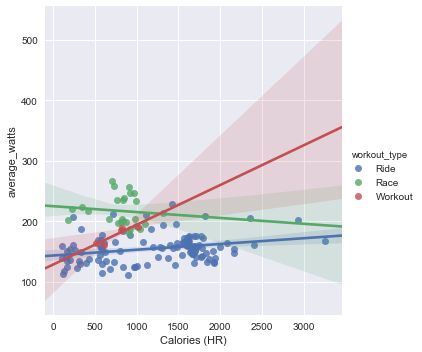

In [51]:
# Correlation between Calories and average_watts
gr = sns.lmplot(x="Calories (HR)", y="average_watts", hue="workout_type", data=result_true)

## CHALLENGE

## #1 Challenge: What leads more kudos?

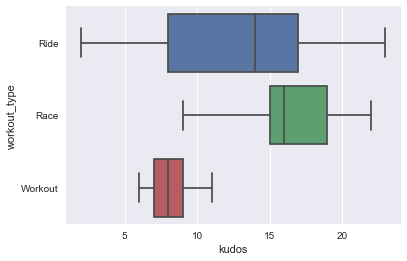

In [52]:
sns.boxplot(data=result_true, x='kudos', y='workout_type')

In [73]:
race = result_true.loc[result_true['workout_type'] == 'Race']
workout = result_true.loc[result_true['workout_type'] == 'Workout']
ride = result_true.loc[result_true['workout_type'] == 'Ride']
print ("Ride mean", ride["kudos"].mean())
print ("Race mean", race["kudos"].mean())
print ("Workout mean", workout["kudos"].mean())

Ride mean 12.398230088495575
Race mean 16.192307692307693
Workout mean 8.2


From the box plot and mean above, it can be conclude that the __race__ category __gains highest kudos__ followed by Ride then the least is Workout

In [ ]:
'workout_type', 'elapsed_time',  'Distance', 'average_temp', 'moving_time', 'Average Speed', 'average_heartrate', 'average_watts', 'NP', 'TSS', 'elevation_gain_number', 'Calories (HR)'

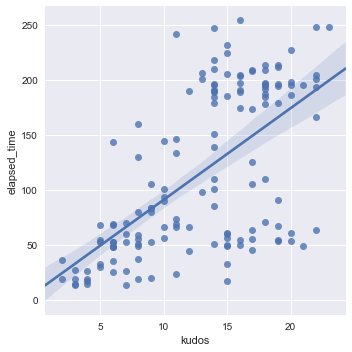

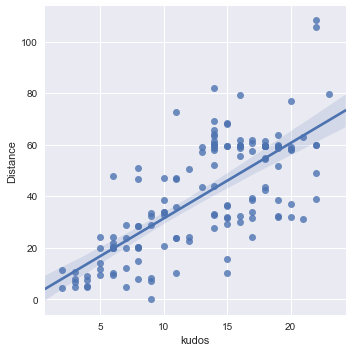

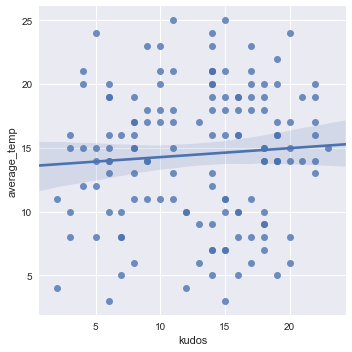

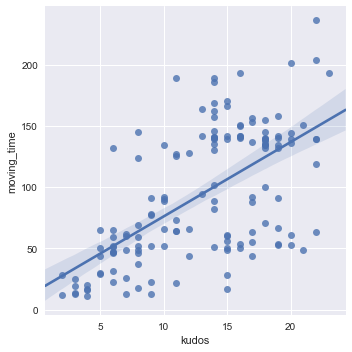

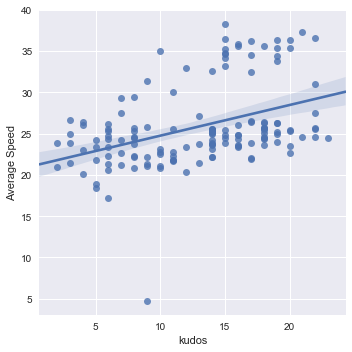

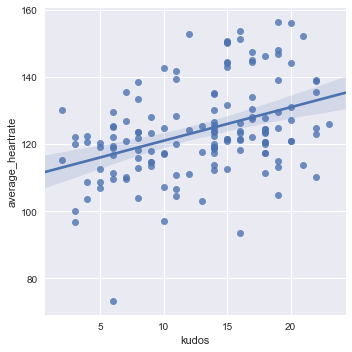

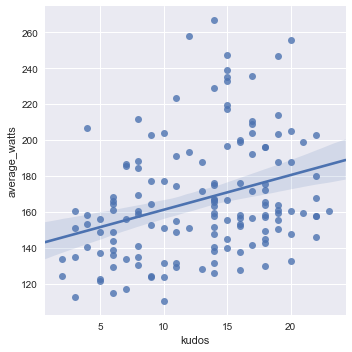

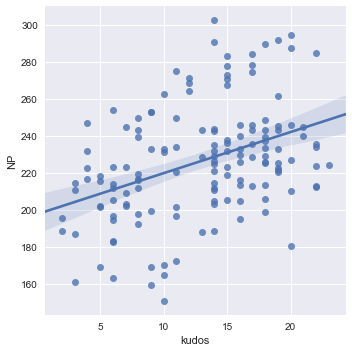

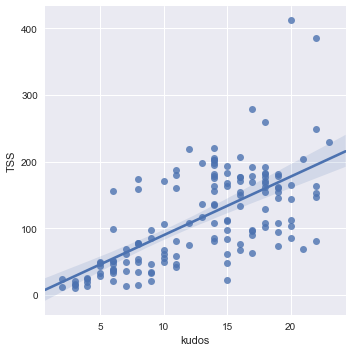

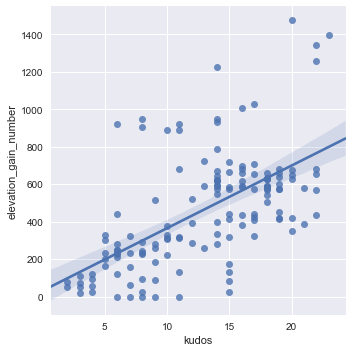

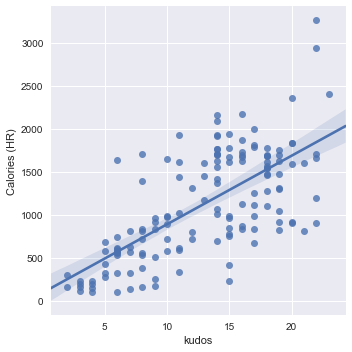

In [88]:
sns.lmplot(x="kudos", y="elapsed_time", data=result_true)
sns.lmplot(x="kudos", y="Distance", data=result_true)
sns.lmplot(x="kudos", y="average_temp", data=result_true)
sns.lmplot(x="kudos", y="moving_time", data=result_true)
sns.lmplot(x="kudos", y="Average Speed", data=result_true)
sns.lmplot(x="kudos", y="average_heartrate", data=result_true)
sns.lmplot(x="kudos", y="average_watts", data=result_true)
sns.lmplot(x="kudos", y="NP", data=result_true)
sns.lmplot(x="kudos", y="TSS", data=result_true)
sns.lmplot(x="kudos", y="elevation_gain_number", data=result_true)
sns.lmplot(x="kudos", y="Calories (HR)", data=result_true)

From the scatter diagram above it can bee seen that some kudos have a positive relationship with these variables:
- elapsed_time
- Distance
- moving_time
- Average Speed
- NP
- TSS
- Elevation gain
- Calories (HR)
As the number of those variables increases, the kudos tends to increase as well.

While in the other categories, it does not seems to be really significant

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import timedelta
plt.style.use('seaborn')
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
import seaborn as sns
from scipy.stats import pearsonr
import seaborn as seabornInstance 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE
from sklearn import datasets
%matplotlib inline

# ------------ P O R T F O L I O  2 ------------ 

# Reproduce the work from journal: 
### Candanedo, L., Feldheim, V. and Deramaix, D. (2017). Data driven prediction models of energy use of appliances in a low-energy house. Energy and Buildings, 140, pp.81-97.

### Objective of The Experiment
The purpose of this experiment is to understand the relationships between the appliances' energy consumption with different predictors. Using the data from the experiment, we would also want to be able to do a prediction of the appliances' energy consumption and also to obtain wich predictors give a significant effect to the energy consumption. 

The energy consumption information is collected with an internet-connected energy monitoring system where it is collected in 10 minutes interval, and then stored and reported by e-mail every 12 hour.

In [2]:
#Import the energydata_complete.csv and use 'date' as the index of the rows
energy = pd.read_csv('data/energydata_complete.csv', index_col='date', parse_dates=True)

energy.index = energy.index.tz_localize('UTC') #Set column as time

#Extracting the year, month, date of the day, day, and hour for further data analysis later
energy['Year'] = energy.index.year
energy['Month'] = energy.index.month
energy['Day'] = energy.index.day
energy['Weekday Name'] = energy.index.weekday_name
energy['Hour'] = energy.index.hour
energy['Weekday Code'] = energy.index.weekday #for linear regression

# Giving code for weekend = 1 and weekday = 0
energy.loc[energy['Weekday Code'] > 4, 'Weekend or Not'] = 1
energy.loc[energy['Weekday Code'] <= 4, 'Weekend or Not'] = 0

# Calculating NSM
time = pd.to_datetime(energy.index)
energy['NSM'] = time.hour*36000+time.minute*60+time.second

energy.head()

Appliances  lights     T1       RH_1    T2  \
date                                                                    
2016-01-11 17:00:00+00:00          60      30  19.89  47.596667  19.2   
2016-01-11 17:10:00+00:00          60      30  19.89  46.693333  19.2   
2016-01-11 17:20:00+00:00          50      30  19.89  46.300000  19.2   
2016-01-11 17:30:00+00:00          50      40  19.89  46.066667  19.2   
2016-01-11 17:40:00+00:00          60      40  19.89  46.333333  19.2   

                                RH_2     T3       RH_3         T4       RH_4  \
date                                                                           
2016-01-11 17:00:00+00:00  44.790000  19.79  44.730000  19.000000  45.566667   
2016-01-11 17:10:00+00:00  44.722500  19.79  44.790000  19.000000  45.992500   
2016-01-11 17:20:00+00:00  44.626667  19.79  44.933333  18.926667  45.890000   
2016-01-11 17:30:00+00:00  44.590000  19.79  45.000000  18.890000  45.723333   
2016-01-11 17:40:00+00:00  44.530000  19.79  45.000000  18.890000  45.530000   

                            ...          rv1        rv2  Year  Month  Day  \
date                        ...                                             
2016-01-11 17:00:00+00:00   ...    13.275433  13.275433  2016      1   11   
2016-01-11 17:10:00+00:00   ...    18.606195  18.606195  2016      1   11   
2016-01-11 17:20:00+00:00   ...    28.642668  28.642668  2016      1   11   
2016-01-11 17:30:00+00:00   ...    45.410389  45.410389  2016      1   11   
2016-01-11 17:40:00+00:00   ...    10.084097  10.084097  2016      1   11   

                           Weekday Name  Hour  Weekday Code  Weekend or Not  \
date                                                                          
2016-01-11 17:00:00+00:00        Monday    17             0             0.0   
2016-01-11 17:10:00+00:00        Monday    17             0             0.0   
2016-01-11 17:20:00+00:00        Monday    17             0             0.0   
2016-01-11 17:30:00+00:00        Monday    17             0             0.0   
2016-01-11 17:40:00+00:00        Monday    17             0             0.0   

                              NSM  
date                               
2016-01-11 17:00:00+00:00  612000  
2016-01-11 17:10:00+00:00  612600  
2016-01-11 17:20:00+00:00  613200  
2016-01-11 17:30:00+00:00  613800  
2016-01-11 17:40:00+00:00  614400  

[5 rows x 36 columns]

### Variability of the Appliances Energy Consumption

The time span of the data set is 137 days (4.5 months). The diagram below shows the energy consumption for the whole period and also the first week period. From the both diagrams below, it can be seen that the energy consumption profile shows a high variability.

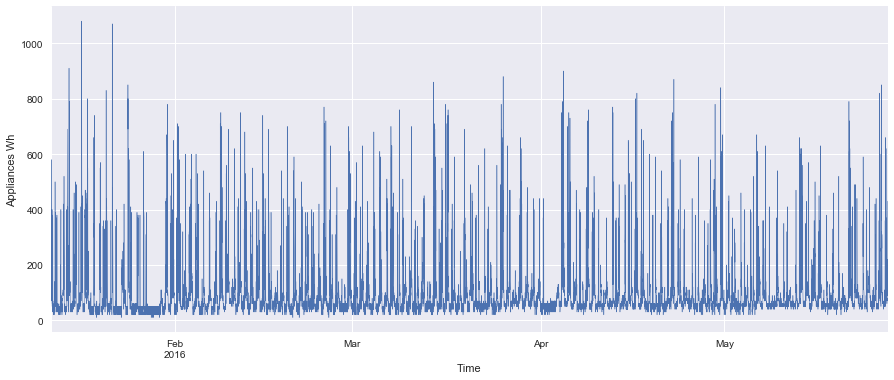

In [4]:
#Line plot over the experiment period

fig, ax = plt.subplots(figsize=(15,6))
energy['Appliances'].plot(linewidth=0.5);
ax.set_ylabel('Appliances Wh')
ax.set_xlabel('Time')

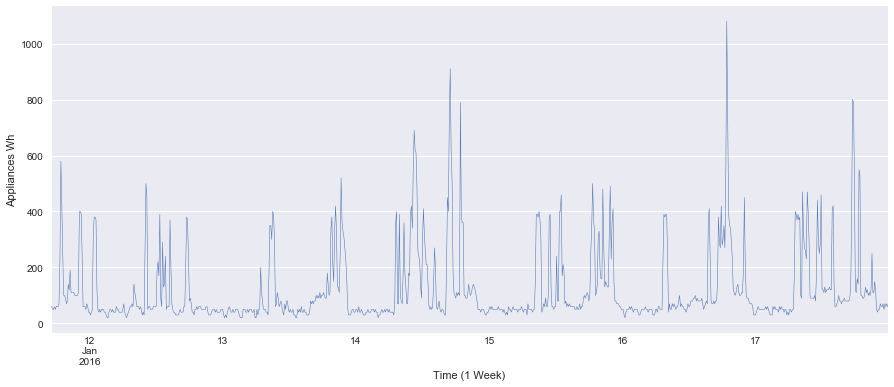

In [3]:
# Select 4 first week for further analysis later
firstweek=energy.loc['2016-1-11 00:00:00':'2016-1-17 23:59:59']
secondweek=energy.loc['2016-1-18 00:00:00':'2016-1-24 23:59:59']
thirdweek=energy.loc['2016-1-25 00:00:00':'2016-1-31 23:59:59']
fourthweek=energy.loc['2016-2-1 00:00:00':'2016-2-7 23:59:59']

# Line plot of the appliances energy consumption for 1 week
fig, ax = plt.subplots(figsize=(15,6))
firstweek['Appliances'].plot(linewidth=0.5);

ax.set_ylabel('Appliances Wh')
ax.set_xlabel('Time (1 Week)')

### Distribution of the Appliances Energy Consumption
From the histogram and box plot diagram below, it can be seen that the appliances energy consumption data has a long tail. The median of the data represented by the blue line inside the box, where it is more dispered. We can also see that there are several outliers in the data shown by the circle.

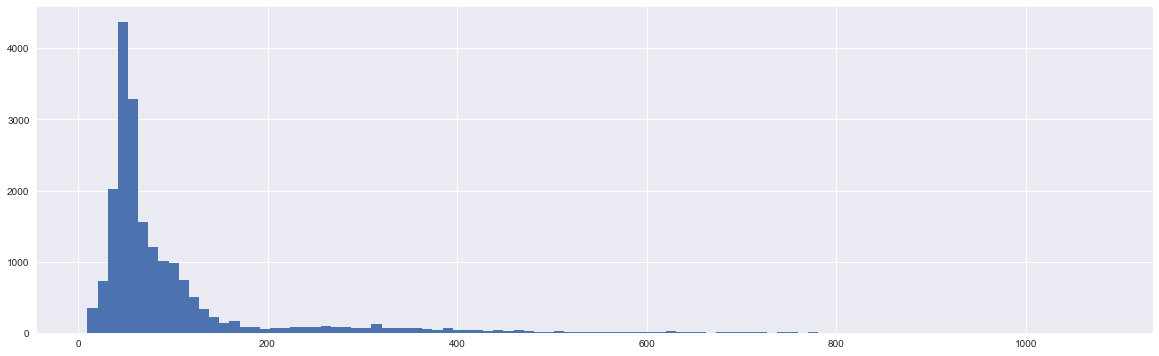

In [4]:
plt.figure(figsize=(20,6))
plt.hist(energy['Appliances'],bins=100)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


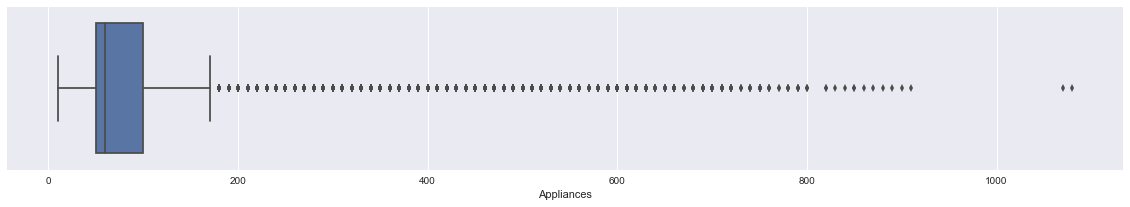

In [14]:
plt.figure(figsize=(20,3))
sns.boxplot(x=energy['Appliances'], vert=False)

It can be seen from the histogram and barplot above the energy data distribution has a really long tail

### Relationship between the Appliances Energy Consumption and all variables

The pairplot diagrams below showing the relationship between all the variables with the energy consumption of appliances ('Appliances'). 

Scatter plot in the lower diagonal show how the two variables intreact. While in the diagonal, a distribution of the variables can be seen in the histogram diagram. Whereas in the upper diagonal, the Pearson correlation coeficient between the two variables shown. A correlation of 1 is total high positive correlation, -1 is total negatve correlation, and 0 represents no correlation.

In [9]:
# Defining the correlation fuction
def corrfunc(x, y, **kws):
    (r, p) = pearsonr(x, y)
    ax = plt.gca()
    ax.text(0.1, 0.1, "{0:.2f}".format(r),
        transform=ax.transAxes,
        color='black', fontsize=60)

# Defining the function of pairplot diagram
def pairplotdiagram(variables):
    g = sns.PairGrid(energy, vars=variables)
    g.map_lower(sns.regplot, color="0",line_kws={"color":"r","alpha":0.7,"lw":2}, scatter_kws={'s':5})
    g.map_upper(corrfunc)
    g.map_diag(sns.distplot,hist_kws={"color":"cyan"},kde_kws={"color":"black","lw":1})

In [15]:
# Defining the variables in each pairplot diagram
list1=['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3']
list2=['Appliances', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6']
list3=['Appliances', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9']
list4=['Appliances', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'NSM','T6']

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


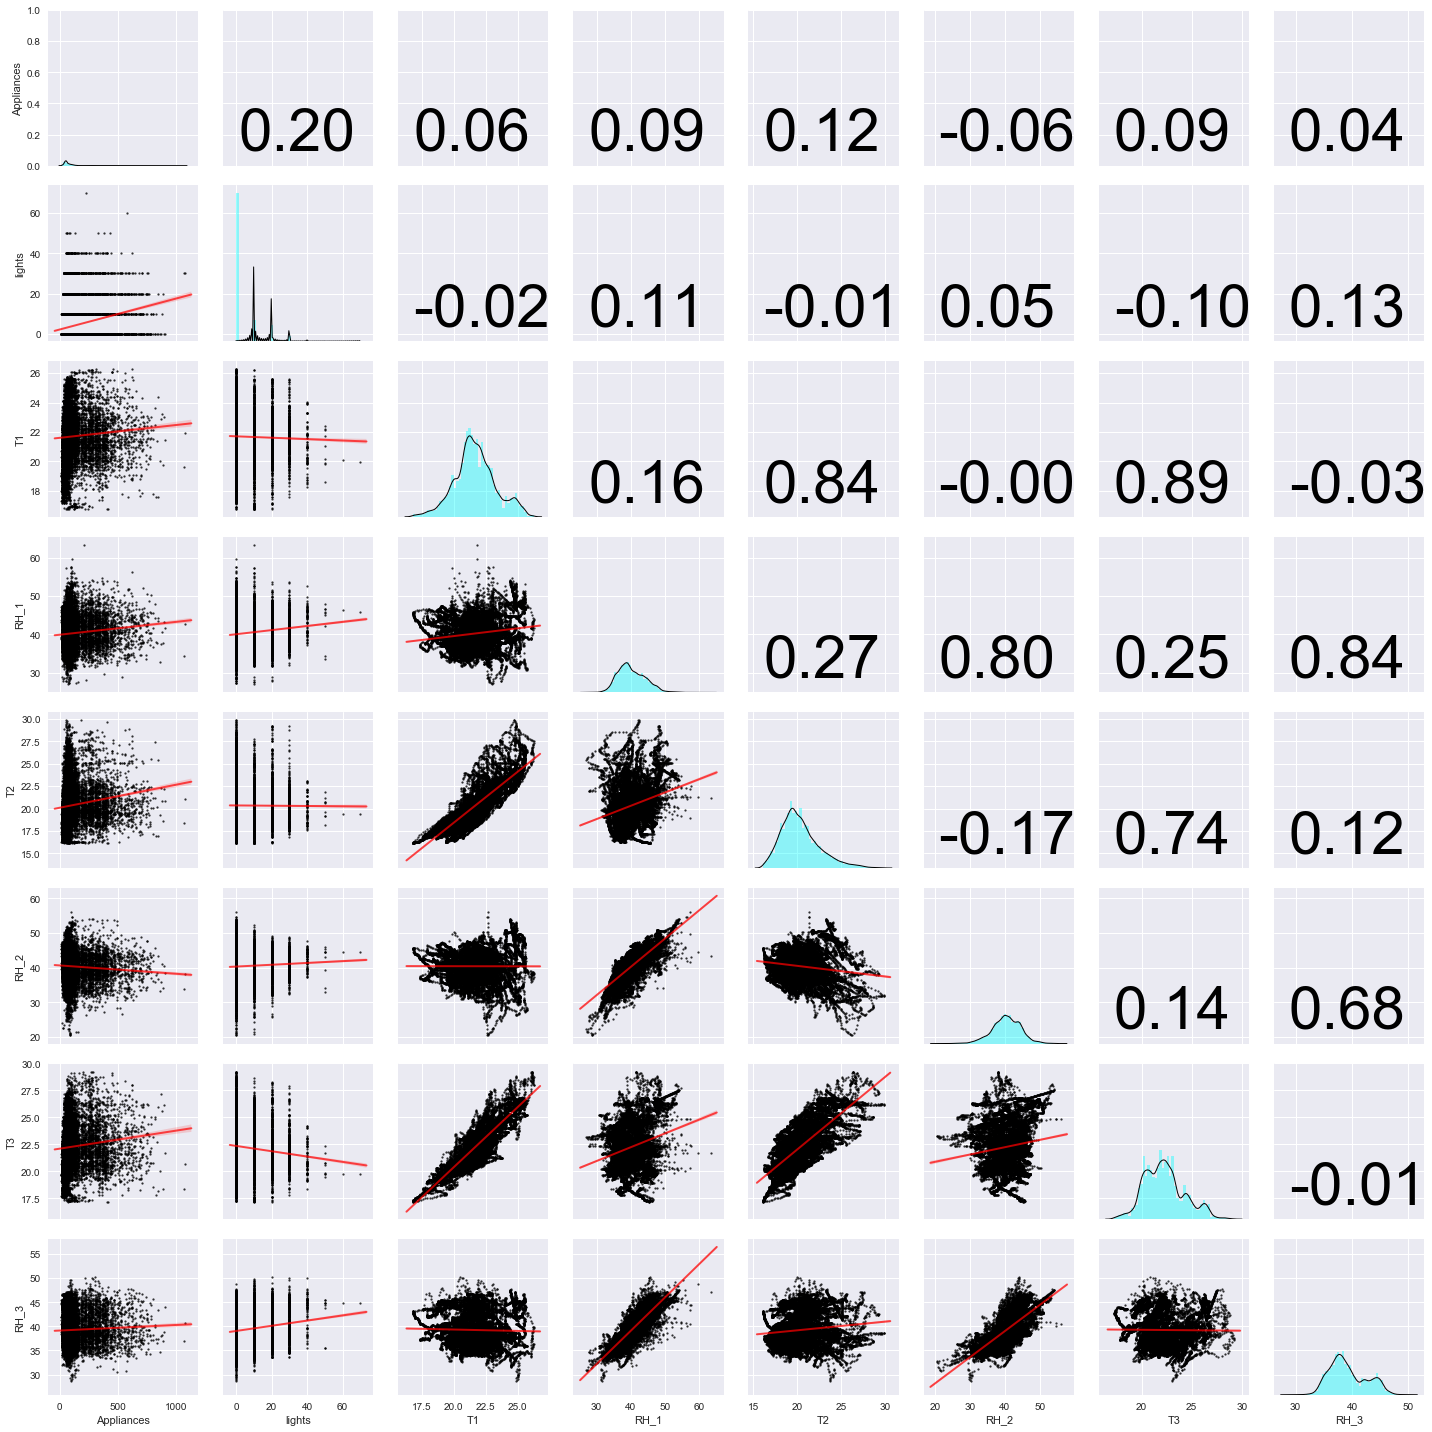

In [11]:
# Print the first pairplot diagram

pairplotdiagram(list1)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


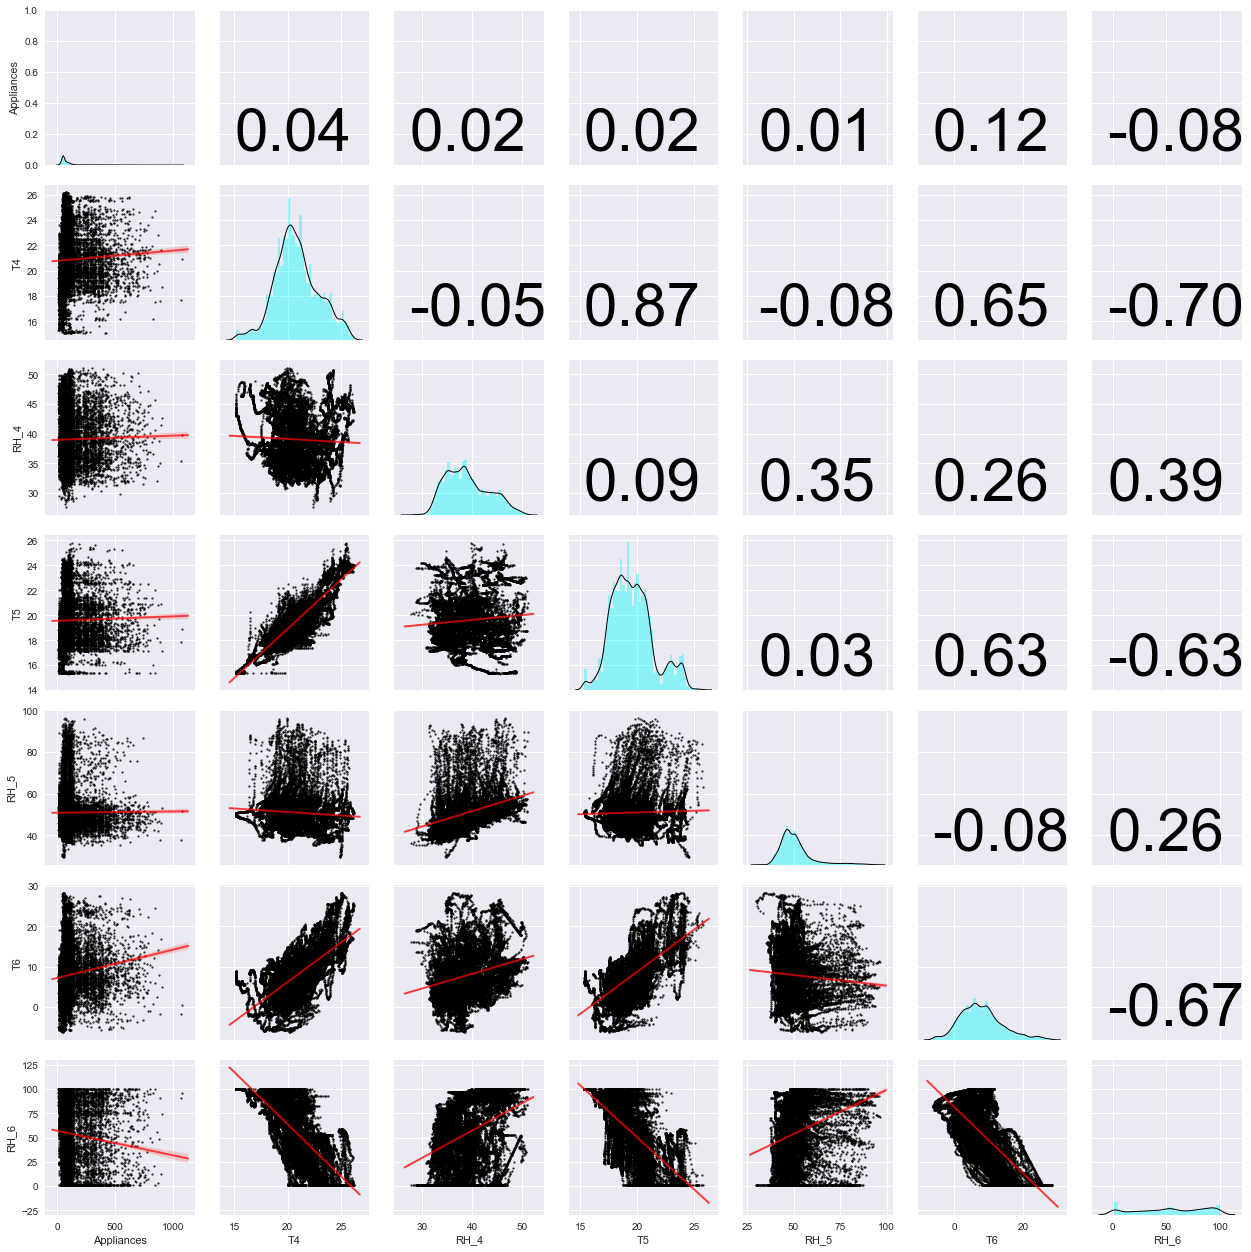

In [12]:
# Print the second pairplot diagram

pairplotdiagram(list2)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


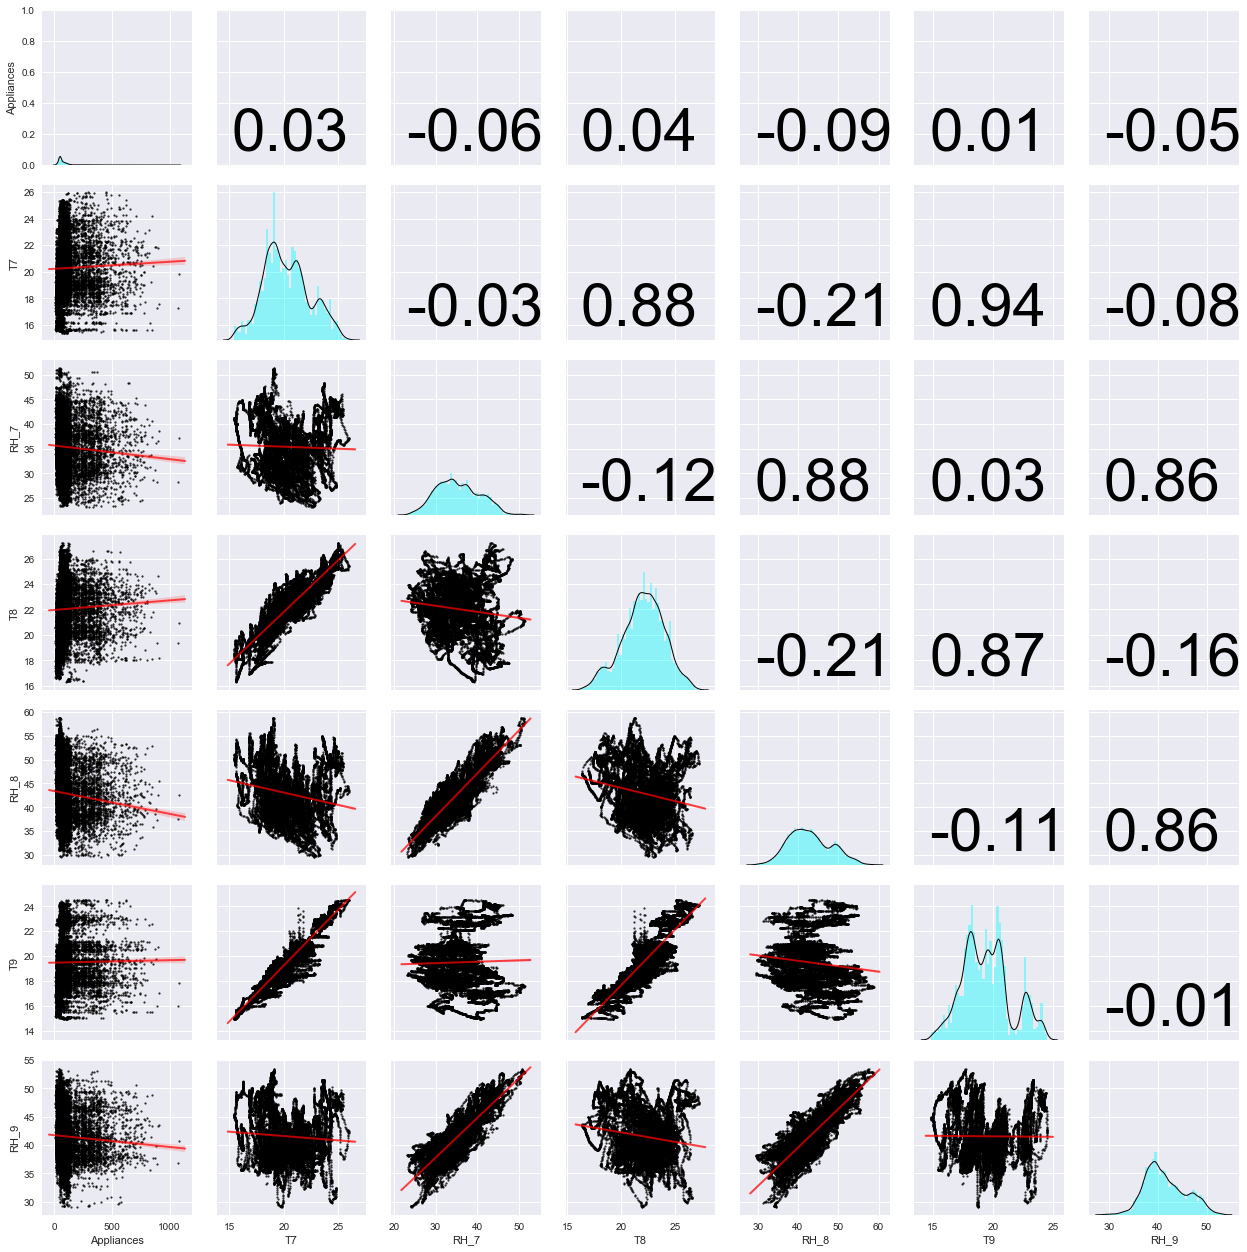

In [16]:
# Print the third pairplot diagram

pairplotdiagram(list3)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


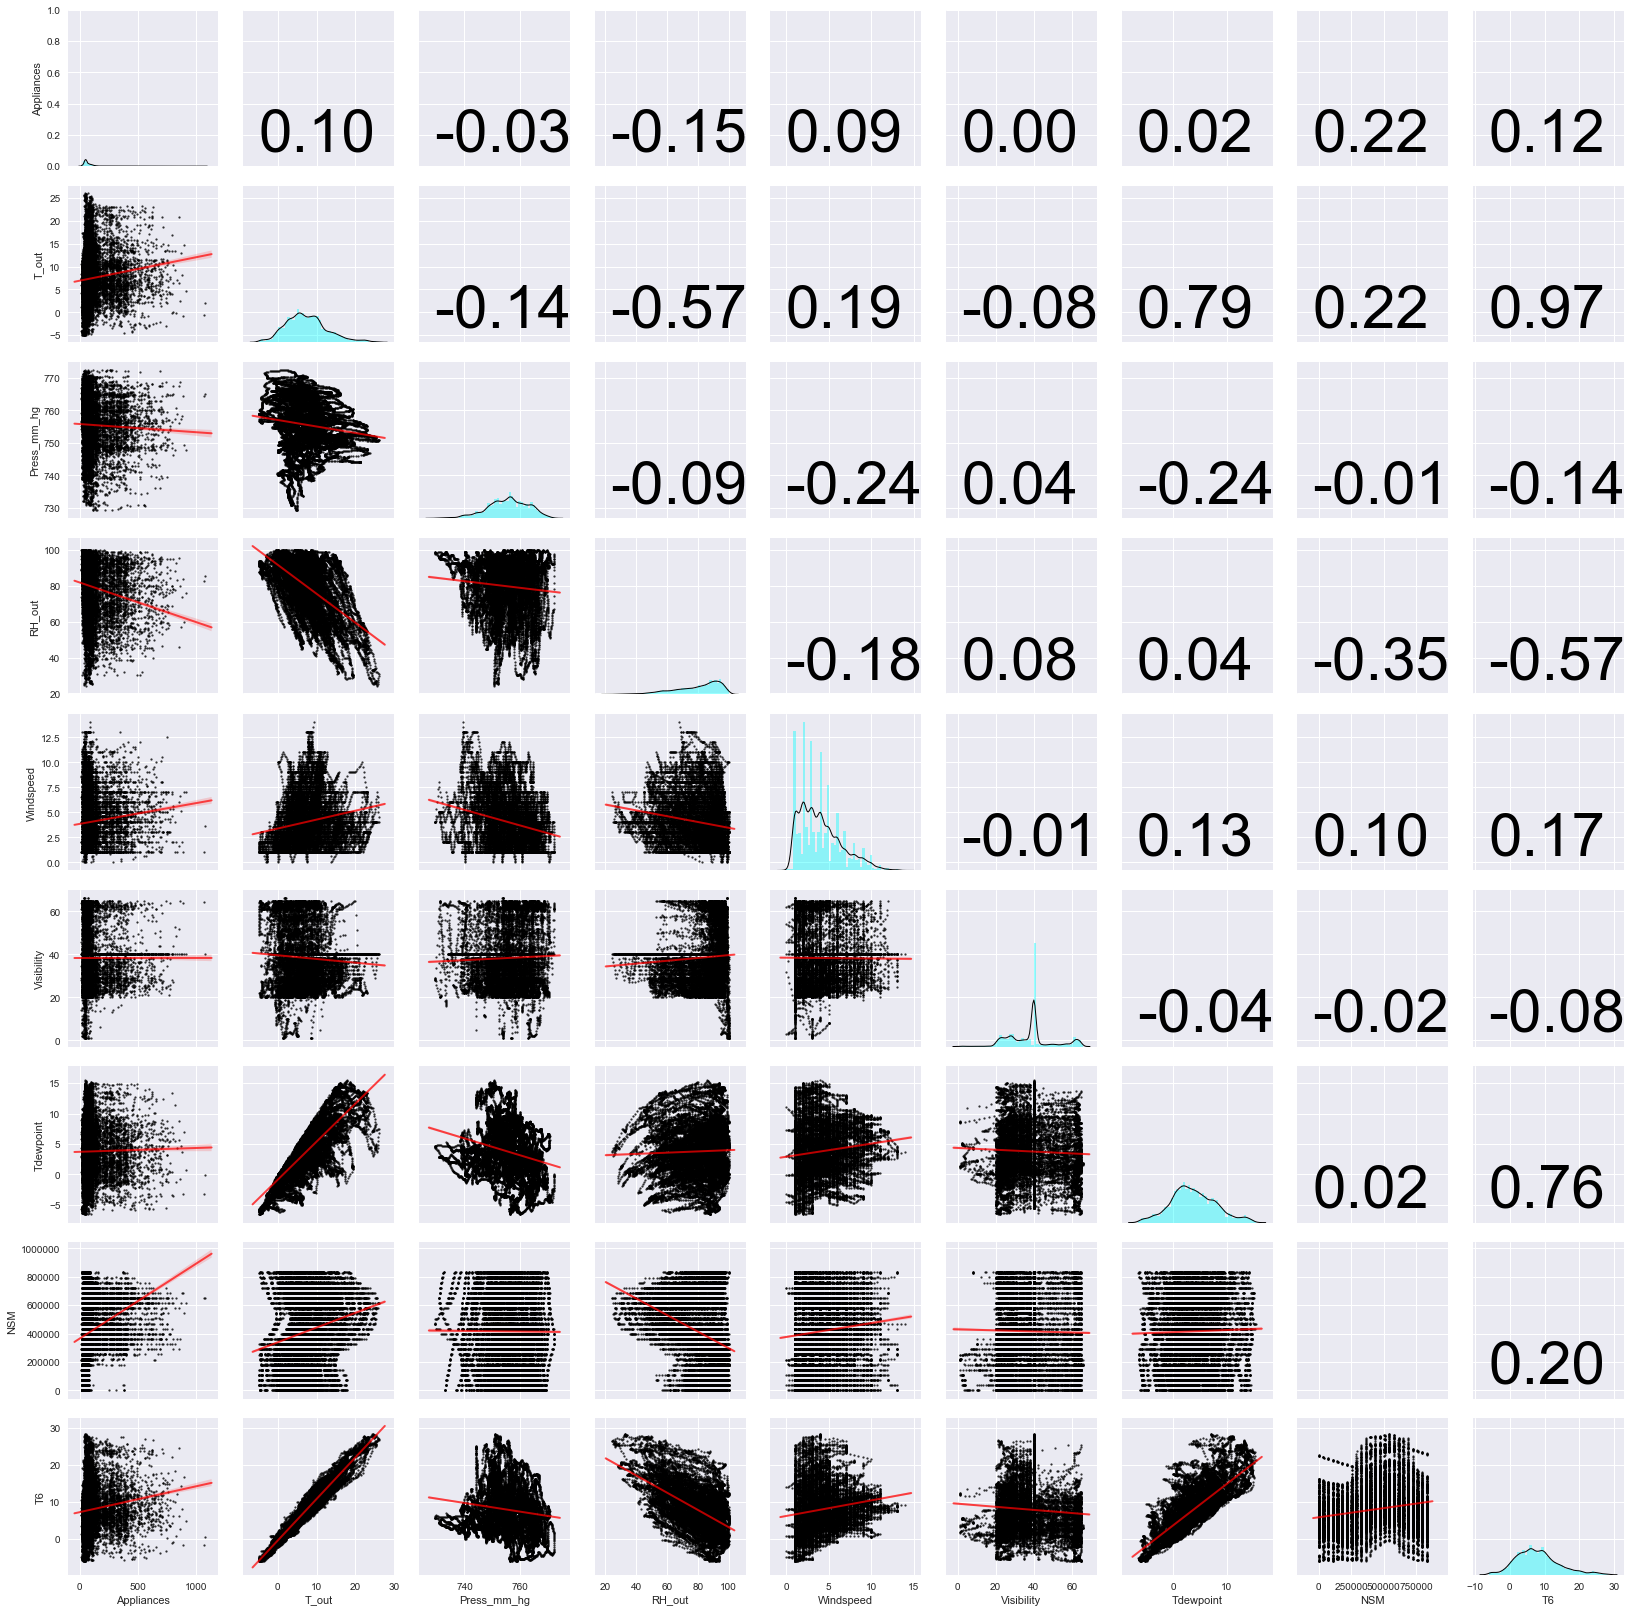

In [17]:
# Print the fourth pairplot diagram

pairplotdiagram(list4)

From the pairplot diagrams above, we can focus on the first line of each diagram to see the correlations coeficient between the appliances energy consumption (Appliances) and other variables. Where, correlation with the 'Lights' variables shown to be the highest with coeficient of 0.20

### Time Trend Identification
An hourly heat map was created for four consecutive weeks of the Appliances Energy Consumption to identify andy time trends. As can be clearly seen, there is a strong time component in the energy consumption pattern. The energy consumption start to rise around 6 in the morning. Then around noon, there are a significant escalation. In term of day of the week, the clear pattern can not be clearly identified.

In [18]:
# Summing Up the Energy Consumption of 10 minutes into an hour total, calculation done for each week

heatmap1=firstweek.groupby(['Day','Hour']).agg('sum')
heatmap2=secondweek.groupby(['Day','Hour']).agg('sum')
heatmap3=thirdweek.groupby(['Day','Hour']).agg('sum')
heatmap4=fourthweek.groupby(['Day','Hour']).agg('sum')

In [19]:
# Defining a fuction to produce the heatmap

def heatmapfigure(xxx):
    #reset the index
    heatmap1_=xxx.reset_index()
    #Make a Pivot by Hour, Day, and the Value is the Appliances
    heatmap_1 = heatmap1_.pivot("Hour", "Day", "Appliances")
    #Make the heatmap
    f, ax = plt.subplots(figsize=(2.5, 6))
    g = sns.heatmap(heatmap_1, cmap="YlOrRd")
    g.set_facecolor('#ffffcc')
    days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] #To give day label on the heatmap
    ax.set_xticklabels(days)
    plt.xticks(rotation=90) #Rotate the label so it can be read clearly

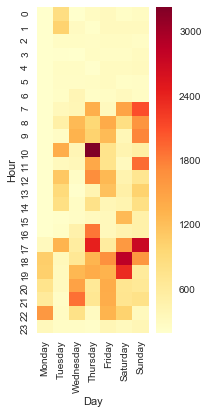

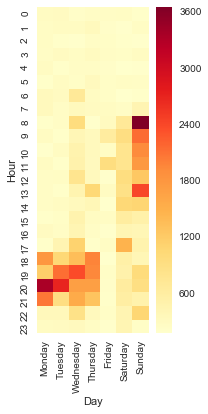

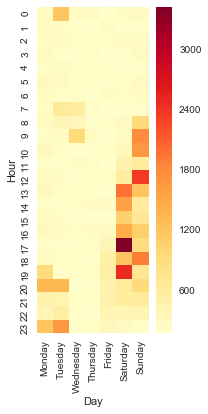

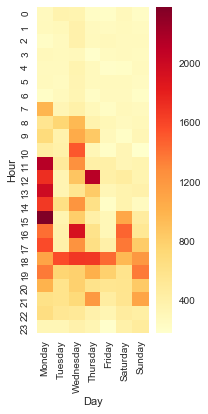

In [20]:
heatmapfigure(heatmap1)
heatmapfigure(heatmap2)
heatmapfigure(heatmap3)
heatmapfigure(heatmap4)

From the heatmap diagram above, it can be seen that there is clearly __a trend in the time axis__, where the __energy tends to increase around 6-8 am__, and it __goes low again around 10-11 pm__. While in the day of the week, we can not clearly see a trend based on the day trend from the 4 week illustration.

## Linear Regression

We use linear regression to be the model that will be used to predict the energy consumption. The data separated to the train and test data, so the model later can be evaluated.

In [21]:
# Separating data randomly, 25% test, 75% train

train, test = train_test_split(energy, test_size=0.25)

# Check the number of the data for the test and train
print(test.shape)
print(train.shape)

(4934, 36)
(14801, 36)


We define the X as all the independent variables, and Y as the dependent variable (the outcome of independent variables)

In [22]:
#Defining X_train, y_train, X_test, y_test

X_train = train[['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'Weekday Code', 'Weekend or Not', 'NSM']]
y_train = train[['Appliances']]
X_test = test[['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'Weekday Code', 'Weekend or Not', 'NSM']]
y_test = test[['Appliances']]

The linear regression equation from the train data:

In [23]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
print("y = x *", reg.coef_, "+", reg.intercept_)

y = x * [[  1.83778771e+00  -3.19538204e+00   1.28252283e+01  -1.66292395e+01
   -1.24544063e+01   2.61269089e+01   6.49279975e+00  -1.94402486e+00
   -7.43125132e-01  -7.58469690e-01   7.88488370e-02   7.57774723e+00
    2.65395490e-01   2.25078619e+00  -1.63083042e+00   6.77172819e+00
   -4.02782295e+00  -1.41309039e+01  -4.92583258e-01  -1.11929588e+01
    2.22295602e-01  -9.92075817e-01   1.87705963e+00   1.62791478e-01
    5.10698276e+00   1.08779608e+00   3.48249333e+00   2.85577366e-05]] + [-68.89801742]


We need to evaluate the RMSE, R squared, MAE, MAPE, and MSE to evaluate our linear model

In [26]:
# Predicting the outcome of the model from the test data
y_pred = reg.predict(X_test)

# Calculate the MAE, MSE, and RMSE

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print() #Space
print('R Squared:', r2_score(y_test, y_pred))  
print() #Space
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))  
print() #Space
print('Mean Absolute Percentage Error (MAPE):', mean_absolute_percentage_error(y_test, y_pred),'%')
print() #Space
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))  


Root Mean Squared Error (RMSE): 94.4452645374

R Squared: 0.173302703081

Mean Absolute Error (MAE): 53.0862063375

Mean Absolute Percentage Error (MAPE): 60.472282592 %

Mean Squared Error (MSE): 8919.90799354


__Analysis:__

The number of our RMSE, Rsquared, MAE, and MAPE are about the same with what on the journal paper (there is a slightly different, but it happens because we separate our train and test data differently)

ValueError: Argument dimensions are incompatible

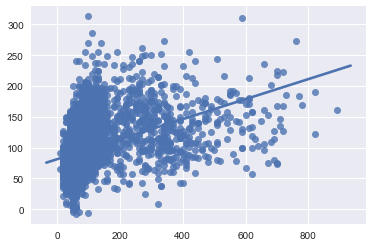

In [31]:
# Residual Plot where Y is the residual
ax1=sns.regplot(y_test['Appliances'], y_pred)

# Feature Selection

In [36]:
# Use linear regression as the model
lr = LinearRegression()
# Rank all features
rfe = RFE(lr, 1) # Using 1 so the ranking will be from 1 to 28
rfe.fit(energy[['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'Weekday Code', 'Weekend or Not', 'NSM']],energy[['Appliances']])

print(rfe.ranking_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[13 21  1  3  2  4 11 12 27 26 24  9 22 17 15  6  8  5 19 10 25 20 14 23 18
 16  7 28]


In [40]:
# Making a new dataframe to see it clearly
df = pd.DataFrame(rfe.ranking_, columns=['Ranking'],) 
# Add new column: Features
df['Features'] = ['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'Weekday Code', 'Weekend or Not', 'NSM']
# Sort the features based on ranking
df.sort_values(by=['Ranking']).reset_index(drop=True)

Ranking        Features
0         1            RH_1
1         2            RH_2
2         3              T2
3         4              T3
4         5              T9
5         6              T8
6         7  Weekend or Not
7         8            RH_8
8         9              T6
9        10           T_out
10       11            RH_3
11       12              T4
12       13          lights
13       14       Windspeed
14       15            RH_7
15       16    Weekday Code
16       17              T7
17       18       Tdewpoint
18       19            RH_9
19       20          RH_out
20       21              T1
21       22            RH_6
22       23      Visibility
23       24            RH_5
24       25     Press_mm_hg
25       26              T5
26       27            RH_4
27       28             NSM

It can be seen that the RFE from our data shows a difference from the journal paper.

# ------------ P O R T F O L I O  3 ------------ 

# Portfolio 3 - Clustering Visualisation

K-means clustering is one of the simplest and popular unsupervised learning algorithms. Typically, unsupervised algorithms make inferences from datasets using only input vectors without referring to known, or labelled, outcomes. This notebook illustrates the process of K-means clustering by generating some random clusters of data and then showing the iterations of the algorithm as random cluster means are updated. 

We first generate random data around 4 centers.

In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib import pyplot as plt
from sklearn.metrics import pairwise_distances_argmin
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
%matplotlib inline

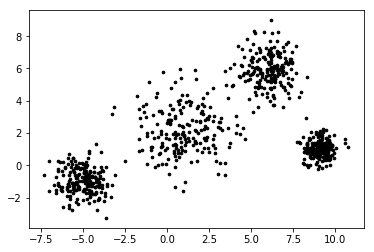

In [7]:
center_1 = np.array([1,2])
center_2 = np.array([6,6])
center_3 = np.array([9,1])
center_4 = np.array([-5,-1])

# Generate random data and center it to the four centers each with a different variance
np.random.seed(5)
data_1 = np.random.randn(200,2) * 1.5 + center_1
data_2 = np.random.randn(200,2) * 1 + center_2
data_3 = np.random.randn(200,2) * 0.5 + center_3
data_4 = np.random.randn(200,2) * 0.8 + center_4

data = np.concatenate((data_1, data_2, data_3, data_4), axis = 0)

plt.scatter(data[:,0], data[:,1], s=7, c='k')
plt.show()

## 1. Generate random cluster centres

You need to generate four random centres.

This part of portfolio should contain at least:  
- The number of clusters `k` is set to 4;
- Generate random centres via `centres = np.random.randn(k,c)*std + mean` where `std` and `mean` are the standard deviation and mean of the data. `c` represents the number of features in the data. Set the random seed to 6.
- Color the generated centers with `green`, `blue`, `yellow`, and `cyan`. Set the edgecolors to `red`.

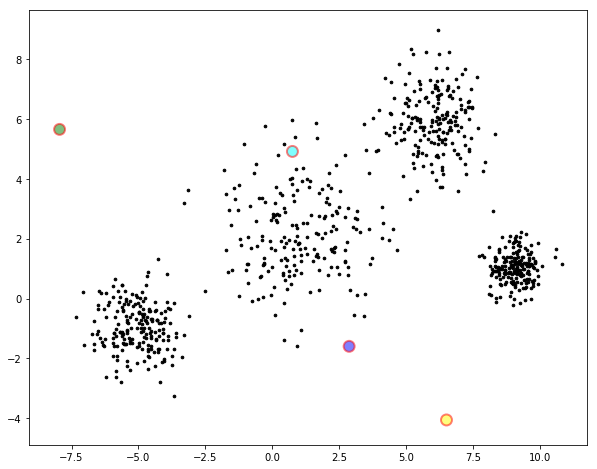

In [8]:
centre_random = np.array([2,2])

# Generate random centres
np.random.seed(6)
randomcentre1 = np.random.randn(1,2) * 4 + centre_random
randomcentre2 = np.random.randn(1,2) * 4 + centre_random
randomcentre3 = np.random.randn(1,2) * 4 + centre_random
randomcentre4 = np.random.randn(1,2) * 4 + centre_random

centres = np.concatenate((randomcentre1, randomcentre2, randomcentre3, randomcentre4), axis = 0)


# Show new generated random centres in Cyan, Blue, Green, and Yellow

fig = plt.figure(figsize=(10,8))
plt.scatter(data[:,0], data[:,1], s=7, c='black')
plt.scatter(centres[:,0], centres[:,1], s=120, c=['cyan','blue','green', 'yellow'],edgecolors='red',linewidth='2', alpha=0.5)

plt.show()

## 2. Visualise the clustering results in each iteration

You need to implement the process of k-means clustering.  Implement each iteration as a seperate cell, assigning each data point to the closest centre, then updating the cluster centres based on the data, then plot the new clusters.

Replace this text with your explaination of the algorithm.  The resulting notebook should provide a good explanation and demonstration of the K-means algorithm.

__K-means__ is a method to cluster set of data into __k__ number of cluster, where each data point is allocated to the nearest cluster that has similarity. In this notebook, the process of clustering using K-means algorithm will be demonstrated. The data that has been randomly generated in section 1 will be used and clustered into 4 cluster (k=4).

The mechanism of __K-means__:
1. Choose any random k centres as the initial step.
2. Assign each data to the nearest centres, so the data will be clustered into k clusters.
3. Get the means of each new cluster to be the new centres.
4. Assign each data to the nearest new centres, and k new clusters will be made.
5. Do step #2 - #4 until the centres are on its stable position (Where they do not move anymore).
6. The clustering result of step #5 is the final clustering where no data is moving to another cluster, meaning that the data has been assigned to the right cluster where they have the similarity.

<img src="data/kmeansflowchart.png" width="500">
<center>
Flowchart of K-Means (A. Bustamam, H. Tasman, N. Yuniarti, Frisca, and I. Mursidah, 2017)
</center>

iteration # 1


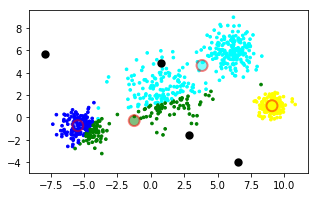

iteration # 2


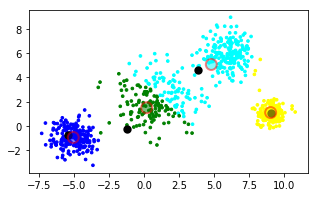

iteration # 3


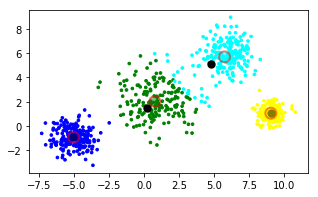

iteration # 4


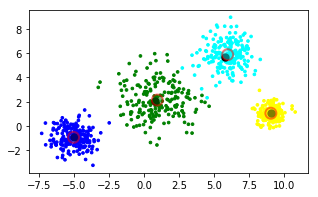

iteration # 5


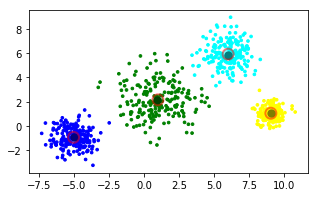

iteration # 6


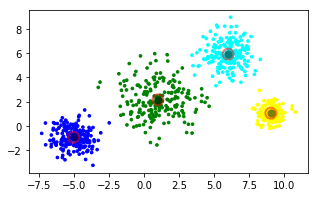

In [13]:
# Our data and centres
data = np.concatenate((data_1, data_2, data_3, data_4), axis = 0)
centres = np.concatenate((randomcentre1, randomcentre2, randomcentre3, randomcentre4), axis = 0)

# Number of Cluster
k=4

#For Iteration Numbering
m=0

#Loop used to to the iteration
while True:
    #Assign each data on 'data' to the nearest 'centres' to make a temporary cluster
    cluster = pairwise_distances_argmin(data, centres)
    
    #Look for new centres in each temporary cluster
    new_centres = np.array([data[cluster == i].mean(axis = 0) for i in range(k)])
    
    #Visualisation
    fig = plt.figure(figsize=(5,3)) #Size of figure
    
    #Iteration numbering
    n=m+1
    print ('iteration #',n)
    
    #Colors set for each cluster
    colors=['cyan','green','blue', 'yellow']
    
    #Each point colored based on its cluster
    plt.scatter(data[:,0], data[:,1], s=7, c=cluster, cmap=matplotlib.colors.ListedColormap(colors))
    
    #Old Centres Colored in Black
    plt.scatter(centres[:,0], centres[:,1], s=40, c='black',edgecolors='black',linewidth='2')
    
    #New Centres Colored in its cluster color and with red edgecolor
    plt.scatter(new_centres[:,0], new_centres[:,1], s=120, c=['cyan','green','blue', 'yellow'],edgecolors='red',linewidth='2', alpha=0.5) #New centres
    plt.show()
    
    if np.all(centres == new_centres): #When the new centres is the same as the previous centres, then final clustered is made
        break
    
    centres = new_centres
    m=n


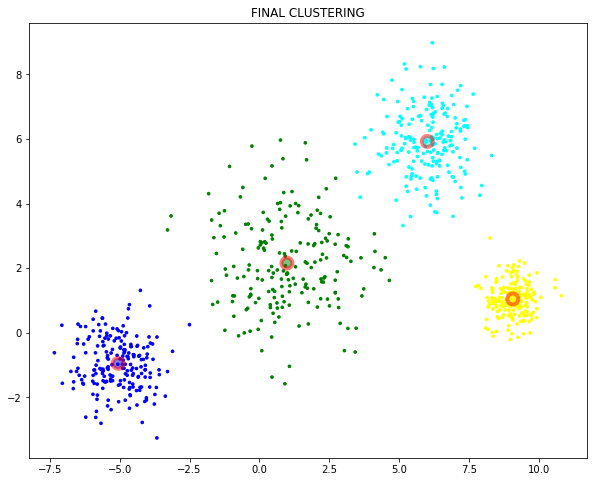

In [15]:
# Final Cluster

fig = plt.figure(figsize=(10,8))
    
plt.title("FINAL CLUSTERING")

#Each point colored based on its cluster
plt.scatter(data[:,0], data[:,1], s=7, c=cluster, cmap=matplotlib.colors.ListedColormap(colors))

# Centres of each cluster shown in red circle
plt.scatter(new_centres[:,0], new_centres[:,1], s=120, c=['cyan','green','blue', 'yellow'],edgecolors='red',linewidth='4', alpha=0.5)
plt.show()